In [1]:
import demo_utils
from demo_utils import ModelConfig, AnalysisConfig, ExperimentRunner

import matplotlib.pyplot as plt

from transformers.utils.logging import disable_progress_bar
disable_progress_bar()

SAVE_PLOT = False

In [2]:
model_config = ModelConfig(
        model_name="mistralai/Mistral-7B-v0.1")
    
analysis_config = AnalysisConfig(
    selected_layers=[0, 6, 13, 20, 27, 32],
    k_neighbors=2,
    barcode_params={"knn": 2, "dim": 3}
)

In [3]:
# Run experiment
runner = ExperimentRunner(model_config, analysis_config)
prompts, last_tokens, month_tokens = runner.run_calendar_analysis()

Disabled automatic differentiation
Generated 12 prompts
✓ Token verification successful: All 12 prompts have correct token positions (month + 'is')

Model predictions:
Prompt  0: 'January' + 4 months → Predicted: 'April'
Prompt  1: 'February' + 4 months → Predicted: 'June'
Prompt  2: 'March' + 4 months → Predicted: 'July'
Prompt  3: 'April' + 4 months → Predicted: 'August'
Prompt  4: 'May' + 4 months → Predicted: 'September'
Prompt  5: 'June' + 4 months → Predicted: 'October'
Prompt  6: 'July' + 4 months → Predicted: 'October'
Prompt  7: 'August' + 4 months → Predicted: 'December'
Prompt  8: 'September' + 4 months → Predicted: 'January'
Prompt  9: 'October' + 4 months → Predicted: 'February'
Prompt 10: 'November' + 4 months → Predicted: 'March'
Prompt 11: 'December' + 4 months → Predicted: 'April'

✓ Prediction verification successful: All 12 predictions are month names
Extracted hidden states: torch.Size([33, 12, 4096])


Analyzing month tokens...
Generating simplex tree without labels


100%|██████████| 33/33 [00:02<00:00, 12.91it/s]

[======================================================================] 100%


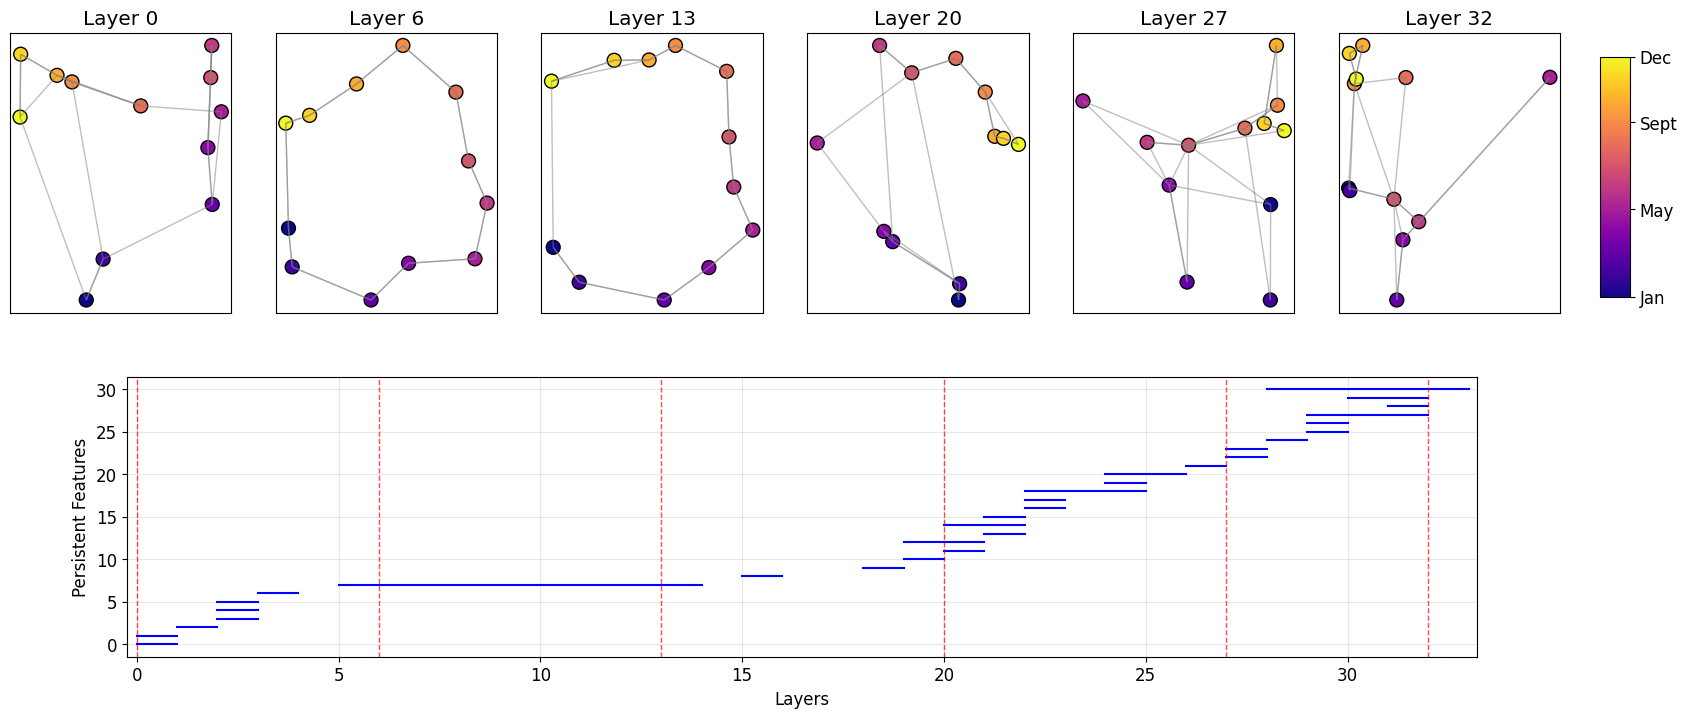

In [4]:
# Analyze month tokens (second-to-last tokens)
print("Analyzing month tokens...")
fig_month = runner.visualize_results(prompts, month_tokens, "Month Token Analysis")
if SAVE_PLOT: plt.savefig('month_tokens.png', bbox_inches='tight')
plt.show()

Analyzing question tokens...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:789: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var


Generating simplex tree without labels


100%|██████████| 33/33 [00:02<00:00, 13.87it/s]

[======================================================================] 100%


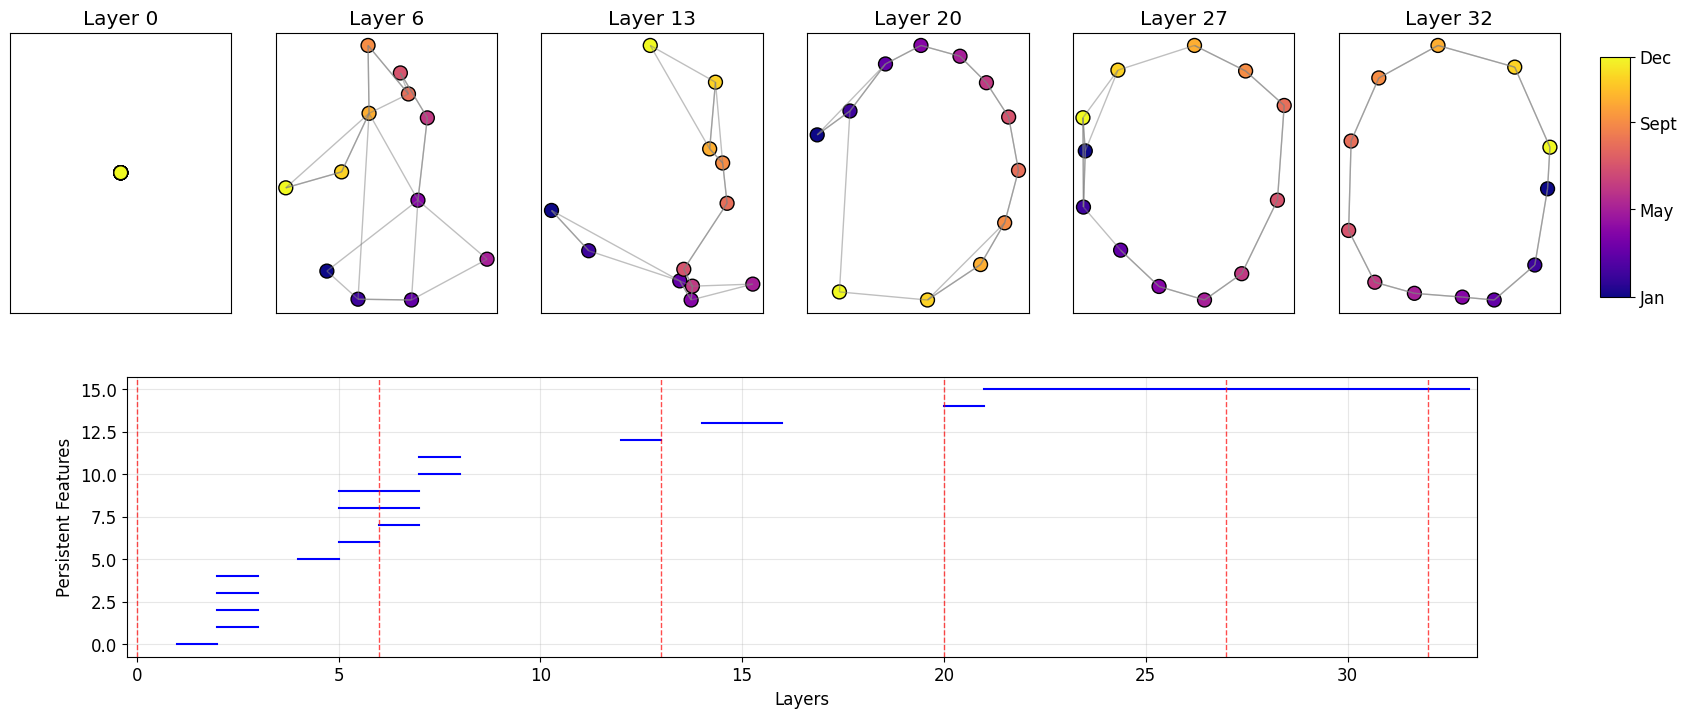

In [5]:
# Analyze last tokens
print("Analyzing question tokens...")
fig_last = runner.visualize_results(prompts, last_tokens, "Last Token Analysis")
if SAVE_PLOT: plt.savefig(f'question_tokens.png', bbox_inches='tight')
plt.show()